# Лабораторная работа #2
### Варламов Никита, М33361; Гайнанов Ильдар, М33371;

# Task 1

Требуется найти оценку указанным методом, смещение, дисперсию, среднеквадратическую ошибку и указать свойства оценок. Также провести эксперимент при указанных параметрах по следующей схеме:

1. Задайте массив объемов выборки.
2. Для каждого объема выборки $n$ сгенерируйте $m$ выборок из вашего распределия и для каждой сгенерированной выборки посчитайте оцентку параметра согласно полученной формуле.
3. Обработайте результаты (посчитайте выборочные характеристики для разницы между оценкой и реальным параметром для каждого объема выборки, количество выборок, для которых оценка отличается от реального парамтера более чем на заданный вами порог и т.п.), визуализируйте результат.

C помощью метода моментов найти оценку параметра $\theta$ распределения с плотностью
$$f_\theta(x) = \dfrac{1}{(k - 1)!\theta^k}x^{k - 1}e^{-x/\theta}\mathbb{1}(x>0),$$
если $k \in \mathbb{N}$ - известный параметр. Эксперимент при $\theta = 2, k = 3$.

$$\mu_n = \int_{0}^{+\infty}x^nf_\theta(x)dx$$

$$\mu_n = \int_{0}^{+\infty} \dfrac{1}{(k - 1)!\theta^k}x^nx^{k - 1}e^{-x/\theta} dx$$

$$\mu_n = \int_{0}^{+\infty} \dfrac{1}{(k - 1)!\theta^k}x^{n + k - 1}e^{-x/\theta} dx = \dfrac{1}{(k - 1)!\theta^k}\int_{0}^{+\infty} x^{n + k - 1}e^{-x/\theta} dx$$

$$\mu_n = \overline{X^n} = \dfrac{\theta^n\Gamma(n + k)}{(k - 1)!}$$

$$\theta^* = \left(\dfrac{\overline{X^n}(k - 1)!}{\Gamma(n + k)}\right)^{\frac{1}{n}}$$

Будем считать 1-й момент (`n = 1`).

$$\theta^* = \dfrac{\overline{X}}{3}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy.stats import rv_continuous
import math

ns = [10, 25, 100, 250, 500]
ms = [10, 25, 100, 250]
true_theta = 2.0
threshold = 0.2

/tmp/ipykernel_74602/691855942.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 - (1 / 8) * math.exp(-x / 2) * (x * (x + 4) + 8)


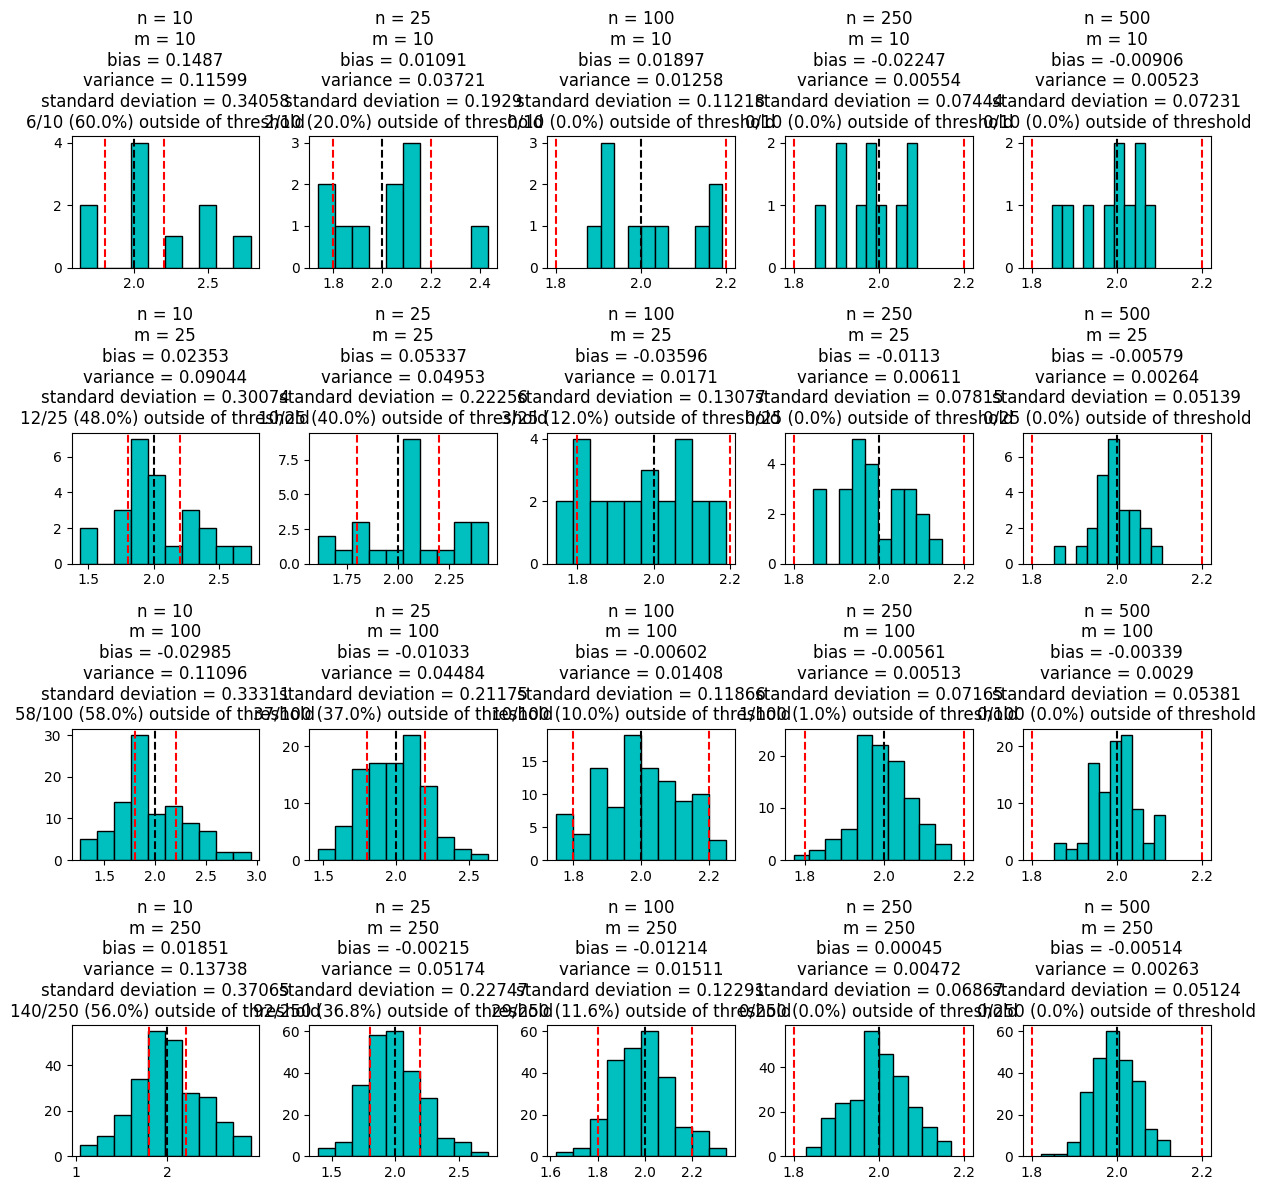

In [2]:
def p(x):
    return 1 - (1 / 8) * math.exp(-x / 2) * (x * (x + 4) + 8)


class cdf_dist_impl(rv_continuous):
    def _cdf(self, x):
        return p(x)


pdf_dist = cdf_dist_impl(a=0, b=float("inf"))


def get_theta(n):
    return np.mean(pdf_dist.rvs(size=n)) / 3

fig, axs = plt.subplots(len(ms), len(ns), figsize=(12, 12))
i = 0
for m in ms:
    for n in ns:
        thetas = np.array([get_theta(n) for _ in range(m)])
        true_thetas = np.array([true_theta for _ in range(m)])

        bias = np.mean(thetas) - true_theta
        var = np.var(thetas - true_thetas)
        std = np.std(thetas - true_thetas)

        out = len(list(filter(lambda x: abs(x) > threshold, thetas - true_thetas)))

        axs.flatten()[i].hist(thetas, color="c", edgecolor="k")
        axs.flatten()[i].set_title(
            f"""n = {n}\n"""
            f"""m = {m}\n"""
            f"""bias = {round(bias, 5)}\n"""
            f"""variance = {round(var, 5)}\n"""
            f"""standard deviation = {round(std, 5)}\n"""
            f"""{out}/{m} ({round(out / m * 100, 1)}%) outside of threshold"""
        )
        axs.flatten()[i].axvline(true_theta, color="k", linestyle="dashed")
        axs.flatten()[i].axvline(true_theta + threshold, color="r", linestyle="dashed")
        axs.flatten()[i].axvline(true_theta - threshold, color="r", linestyle="dashed")
        i += 1
fig.tight_layout()

# Properties

### Состоятельность: 
- $\theta^* \xrightarrow[n\rightarrow\infty]{P}0$ - выполняется.

### Несмещенность:
- $\mathbb{E}\theta^* = \dfrac{\mu_1}{3} = \dfrac{\frac{\theta\cdot3!}{2!}}{3} =\theta$ - выполняется.
- $\mathbb{E}\theta^* \xrightarrow[n\rightarrow\infty]{}\theta$ - выполняется асимптотическая несмещенность.